<a href="https://colab.research.google.com/github/gb08/Deep_learning_with_Colab/blob/master/Image_classification_with_Deep_Nets_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
from tensorflow import keras  # tf.keras
import time

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

In [0]:
drive.mount('/content/gdrive')
#!ls gdrive/My\ Drive

model_path = '/content/gdrive/YOUR PATH'

In [0]:
%matplotlib inline
%load_ext tensorboard

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

4423680/4422102 [==============================] - 0s 0us/step


In [0]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32).reshape(-1, 28 * 28)).reshape(-1, 28, 28)
X_valid_scaled = scaler.transform(X_valid.astype(np.float32).reshape(-1, 28 * 28)).reshape(-1, 28, 28)
X_test_scaled = scaler.transform(X_test.astype(np.float32).reshape(-1, 28 * 28)).reshape(-1, 28, 28)

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(1e-3),
              metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=10,
                    validation_data=(X_valid_scaled, y_valid))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 7s 128us/sample - loss: 2.3021 - acc: 0.1378 - val_loss: 2.3017 - val_acc: 0.1612
Epoch 2/10
55000/55000 [==============================] - 7s 122us/sample - loss: 2.3011 - acc: 0.1877 - val_loss: 2.3004 - val_acc: 0.1780
Epoch 3/10
55000/55000 [==============================] - 7s 121us/sample - loss: 2.2988 - acc: 0.2030 - val_loss: 2.2965 - val_acc: 0.2100
Epoch 4/10
55000/55000 [==============================] - 7s 122us/sample - loss: 2.2915 - acc: 0.2025 - val_loss: 2.2856 - val_acc: 0.2012
Epoch 5/10
55000/55000 [==============================] - 7s 121us/sample - loss: 2.2754 - acc: 0.2007 - val_loss: 2.2631 - val_acc: 0.1972
Epoch 6/10
55000/55000 [==============================] - 7s 122us/sample - loss: 2.2405 - acc: 0.2006 - val_loss: 2.2128 - val_acc: 0.1988
Epoch 7/10
55000/55000 [======

NameError: ignored

In [0]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

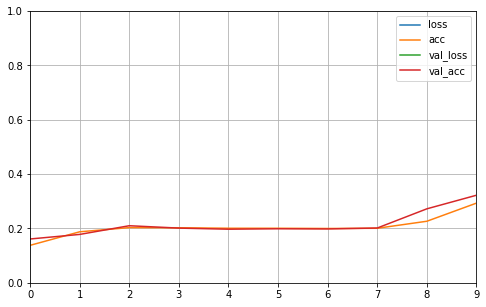

In [10]:
plot_learning_curves(history)

In [0]:

bn_model = keras.models.Sequential()
bn_model.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    bn_model.add(keras.layers.Dense(100, activation="relu"))
    bn_model.add(keras.layers.BatchNormalization())
bn_model.add(keras.layers.Dense(10, activation="softmax"))
bn_model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(1e-3),
              metrics=["accuracy"])


In [12]:
history = bn_model.fit(X_train_scaled, y_train, epochs=10,
                    validation_data=(X_valid_scaled, y_valid))


Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 18s 325us/sample - loss: 1.9211 - acc: 0.3634 - val_loss: 1.0773 - val_acc: 0.6302
Epoch 2/10
55000/55000 [==============================] - 16s 288us/sample - loss: 1.1342 - acc: 0.6015 - val_loss: 0.8017 - val_acc: 0.7156
Epoch 3/10
55000/55000 [==============================] - 16s 290us/sample - loss: 0.9774 - acc: 0.6555 - val_loss: 0.6953 - val_acc: 0.7446
Epoch 4/10
55000/55000 [==============================] - 16s 285us/sample - loss: 0.8904 - acc: 0.6867 - val_loss: 0.6427 - val_acc: 0.7698
Epoch 5/10
55000/55000 [==============================] - 16s 293us/sample - loss: 0.8360 - acc: 0.7093 - val_loss: 0.5928 - val_acc: 0.7922
Epoch 6/10
55000/55000 [==============================] - 16s 298us/sample - loss: 0.7876 - acc: 0.7261 - val_loss: 0.5643 - val_acc: 0.8020
Epoch 7/10
55000/55000 [==============================] - 16s 294us/sample - loss: 0.7456 - acc: 0.7401 -

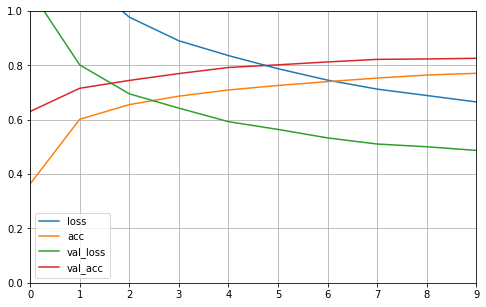

In [13]:
plot_learning_curves(history)

In [14]:
bn_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 100)               78500     
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_23 (Dense)             (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)              

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 14s 248us/sample - loss: 0.6804 - acc: 0.7636 - val_loss: 0.5105 - val_acc: 0.8282
Epoch 2/10
55000/55000 [==============================] - 12s 227us/sample - loss: 0.4600 - acc: 0.8382 - val_loss: 0.4533 - val_acc: 0.8434
Epoch 3/10
55000/55000 [==============================] - 13s 238us/sample - loss: 0.4050 - acc: 0.8565 - val_loss: 0.4175 - val_acc: 0.8526
Epoch 4/10
55000/55000 [==============================] - 13s 239us/sample - loss: 0.3718 - acc: 0.8665 - val_loss: 0.3982 - val_acc: 0.8604
Epoch 5/10
55000/55000 [==============================] - 13s 234us/sample - loss: 0.3484 - acc: 0.8756 - val_loss: 0.3930 - val_acc: 0.8632
Epoch 6/10
55000/55000 [==============================] - 13s 237us/sample - loss: 0.3307 - acc: 0.8827 - val_loss: 0.3742 - val_acc: 0.8688
Epoch 7/10


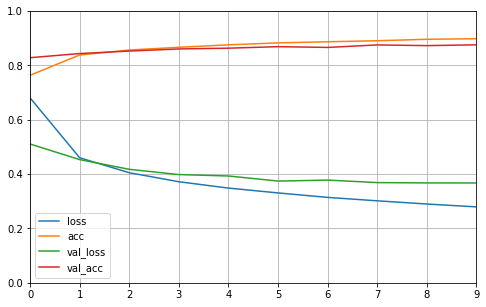

In [18]:
## SELU ACTIVATION

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(1e-3),
              metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=10,
                    validation_data=(X_valid_scaled, y_valid))
plot_learning_curves(history)

Train for 10 more epochs

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 11s 194us/sample - loss: 0.2700 - acc: 0.9035 - val_loss: 0.3616 - val_acc: 0.8778
Epoch 2/10
55000/55000 [==============================] - 10s 191us/sample - loss: 0.2613 - acc: 0.9049 - val_loss: 0.3597 - val_acc: 0.8766
Epoch 3/10
55000/55000 [==============================] - 11s 192us/sample - loss: 0.2523 - acc: 0.9092 - val_loss: 0.3571 - val_acc: 0.8760
Epoch 4/10
55000/55000 [==============================] - 11s 200us/sample - loss: 0.2443 - acc: 0.9117 - val_loss: 0.3650 - val_acc: 0.8756
Epoch 5/10
55000/55000 [==============================] - 11s 195us/sample - loss: 0.2375 - acc: 0.9139 - val_loss: 0.3680 - val_acc: 0.8724
Epoch 6/10
55000/55000 [==============================] - 11s 194us/sample - loss: 0.2301 - acc: 0.9161 - val_loss: 0.3675 - val_acc: 0.8744
Epoch 7/10
55000/55000 [==============================] - 10s 189us/sample - loss: 0.2237 - acc: 0.9195 -

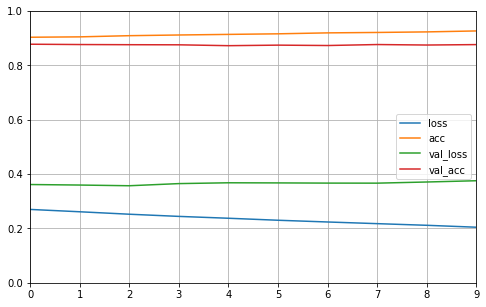

In [19]:
history = model.fit(X_train_scaled, y_train, epochs=10,
                    validation_data=(X_valid_scaled, y_valid))
plot_learning_curves(history)

ADD reguralization as model is overfitting with 10 more epochs. Put Dropout layer. Using Alphadroupout, as using Alpha Normalization.

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 12s 211us/sample - loss: 1.1772 - acc: 0.6151 - val_loss: 0.7431 - val_acc: 0.8162
Epoch 2/20
55000/55000 [==============================] - 11s 194us/sample - loss: 0.6665 - acc: 0.7886 - val_loss: 0.6924 - val_acc: 0.8422
Epoch 3/20
55000/55000 [==============================] - 11s 193us/sample - loss: 0.5571 - acc: 0.8232 - val_loss: 0.6654 - val_acc: 0.8570
Epoch 4/20
55000/55000 [==============================] - 11s 196us/sample - loss: 0.4961 - acc: 0.8395 - val_loss: 0.6217 - val_acc: 0.8636
Epoch 5/20
55000/55000 [==============================] - 11s 198us/sample - loss: 0.4563 - acc: 0.8519 - val_loss: 0.6384 - val_acc: 0.8622
Epoch 6/20
55000/55000 [==============================] - 12s 218us/sample - loss: 0.4284 - acc: 0.8602 - val_loss: 0.5905 - val_acc: 0.8666
Epoch 7/20
55000/55000 [==============================] - 11s 198us/sample - loss: 0.4067 - acc: 0.8661 -

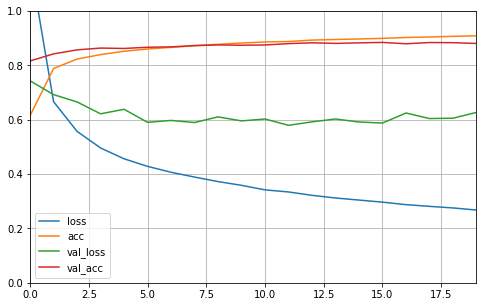

In [20]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.AlphaDropout(rate=0.5))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(1e-3),
              metrics=["accuracy"])



In [0]:
history = model.fit(X_train_scaled, y_train, epochs=20,
                    validation_data=(X_valid_scaled, y_valid))

In [0]:
plot_learning_curves(history)
